In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('Admission_Predict_Ver1.1.csv')

In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.drop(columns = ['Serial No.'] , inplace = True)

In [6]:
X = df.iloc[:,0:-1]
y = df.iloc[:, -1]

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train , X_test , y_train , y_test = train_test_split(X,y , train_size = 0.2, random_state=1)

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled.shape

(100, 7)

In [12]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [15]:
model = Sequential()
model.add(Dense(14,activation = 'relu' , input_dim = 7))
model.add(Dense(7,activation = 'relu'))
model.add(Dense(1,activation = 'linear'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                112       
                                                                 
 dense_1 (Dense)             (None, 7)                 105       
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 225 (900.00 Byte)
Trainable params: 225 (900.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [26]:
model.compile(loss = 'mean_squared_error' , optimizer = 'Adam' , metrics = ['accuracy'])
history = model.fit(X_train_scaled , y_train , epochs = 100  , verbose = 2 , validation_split = 0.2)

Epoch 1/100
3/3 - 1s - loss: 0.0312 - accuracy: 0.0000e+00 - val_loss: 0.0220 - val_accuracy: 0.0000e+00 - 1s/epoch - 404ms/step
Epoch 2/100
3/3 - 0s - loss: 0.0290 - accuracy: 0.0000e+00 - val_loss: 0.0213 - val_accuracy: 0.0000e+00 - 76ms/epoch - 25ms/step
Epoch 3/100
3/3 - 0s - loss: 0.0271 - accuracy: 0.0000e+00 - val_loss: 0.0203 - val_accuracy: 0.0000e+00 - 58ms/epoch - 19ms/step
Epoch 4/100
3/3 - 0s - loss: 0.0255 - accuracy: 0.0000e+00 - val_loss: 0.0191 - val_accuracy: 0.0000e+00 - 71ms/epoch - 24ms/step
Epoch 5/100
3/3 - 0s - loss: 0.0237 - accuracy: 0.0000e+00 - val_loss: 0.0180 - val_accuracy: 0.0000e+00 - 72ms/epoch - 24ms/step
Epoch 6/100
3/3 - 0s - loss: 0.0219 - accuracy: 0.0000e+00 - val_loss: 0.0168 - val_accuracy: 0.0000e+00 - 73ms/epoch - 24ms/step
Epoch 7/100
3/3 - 0s - loss: 0.0203 - accuracy: 0.0000e+00 - val_loss: 0.0156 - val_accuracy: 0.0000e+00 - 69ms/epoch - 23ms/step
Epoch 8/100
3/3 - 0s - loss: 0.0185 - accuracy: 0.0000e+00 - val_loss: 0.0145 - val_accurac

In [27]:
y_pred = model.predict(X_test_scaled)
# y_pred

13/13 [==============================] - 0s 2ms/step


In [28]:
from sklearn.metrics import r2_score

In [29]:
r2_score(y_test , y_pred)

0.7511488780809792

In [30]:
import matplotlib.pyplot as plt

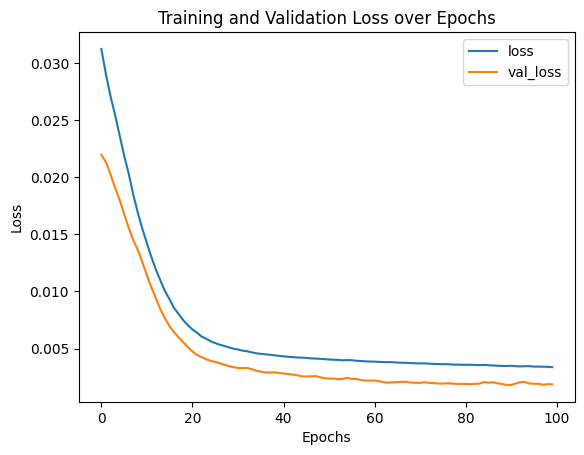

In [31]:
plt.plot(history.history['loss'] )
plt.plot(history.history['val_loss'])
plt.legend(['loss' , 'val_loss'])

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')

plt.show()

<ipython-input-38-1df5c5599abf>:9: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.ylim(-0.1,0.1,1000)


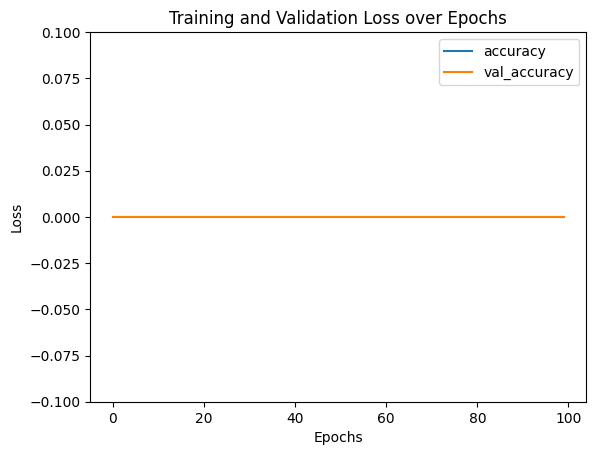

In [38]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy' , 'val_accuracy'])

# Add labels and title
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.ylim(-0.1,0.1,1000)
plt.show()

In [37]:
history.history['accuracy']

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]